# Ujian Akhir Semester Data Mining

- Muhammad Daffa Yusuf Fadhilah
- 2100543
- Ilmu Komputer C2 2021

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

### Import Data

Melihat data pmi dimana memiliki jangka tahun 2010-2022

In [227]:
data_pmi = pd.read_csv('https://raw.githubusercontent.com/mdaffayusuff/Ujian_Akhir_Semester_Data_Mining/main/UAS/dataset_uas_datamining_jan_23/pmi.csv')
data_pmi.tahun.value_counts()

2022    34
2021    34
2020    34
2019    34
2018    34
2017    34
2016    34
2015    34
2014    34
2013    34
2012    34
2011    34
2010    34
Name: tahun, dtype: int64

Melihat data persenan penyewa rumah dimana memiliki jangka tahun 2015-2021

In [228]:
data_menyewa_rumah = pd.read_csv('https://raw.githubusercontent.com/mdaffayusuff/Ujian_Akhir_Semester_Data_Mining/main/UAS/dataset_uas_datamining_jan_23/persen_rumah_menyewa.csv')
data_menyewa_rumah.tahun.value_counts()

2021    35
2020    35
2019    35
2018    35
2017    35
2016    35
2015    35
Name: tahun, dtype: int64

Melihat data keterampilan dalam tik dimana memiliki jangka tahun 2015-2021

In [229]:
data_trampil = pd.read_csv('https://raw.githubusercontent.com/mdaffayusuff/Ujian_Akhir_Semester_Data_Mining/main/UAS/dataset_uas_datamining_jan_23/persen_penduduk_trampil_tik.csv')
data_trampil.tahun.value_counts()

2021    35
2020    35
2019    35
2018    35
2017    35
2016    35
2015    35
Name: tahun, dtype: int64

Data persenan ketidak cukupan dalam pangan dimana memiliki jangka tahun 2017-2021

In [230]:
data_tidakcukupPangan = pd.read_csv('https://raw.githubusercontent.com/mdaffayusuff/Ujian_Akhir_Semester_Data_Mining/main/UAS/dataset_uas_datamining_jan_23/ketidak_cukupan_pangan_prov.csv')
data_tidakcukupPangan.tahun.value_counts()

2021    35
2020    35
2019    35
2018    35
2017    35
Name: tahun, dtype: int64

Data proporsi kerja non informal pada sektor non-pertanian dimana memiliki jangka tahun 2015-2021

In [231]:
data_proporsiKerja = pd.read_csv('https://raw.githubusercontent.com/mdaffayusuff/Ujian_Akhir_Semester_Data_Mining/main/UAS/dataset_uas_datamining_jan_23/proporsi_kerja_informal_nonpertanian.csv')
data_proporsiKerja.tahun.value_counts()

2021    35
2020    35
2019    35
2018    35
2017    35
2016    35
2015    35
Name: tahun, dtype: int64

Data persen rumah dengan fasilitas cuci tangan dengan sabun memiliki jangka tahun 2016-2021

In [232]:
data_fasilitasSabun = pd.read_csv('https://raw.githubusercontent.com/mdaffayusuff/Ujian_Akhir_Semester_Data_Mining/main/UAS/dataset_uas_datamining_jan_23/persen_rumah_dgn_fasilitas_cuci_tangan_sabun.csv')
data_fasilitasSabun.tahun.value_counts()

2021    35
2020    35
2019    35
2018    35
2017    35
2016    35
Name: tahun, dtype: int64

### Praproses

##### Merge Tabel

Dikarenakan data lain mayoritas tidak memiliki data tahun 2022, maka data tahun 2022 akan diabaikan

In [233]:
data_pmi_till2021 = data_pmi[(data_pmi.tahun != 2022)]
data_pmi_till2021

,prov,tahun,kategori_pmi
34,ACEH,2021,TINGGI
35,SUMATERA UTARA,2021,TINGGI
36,SUMATERA BARAT,2021,TINGGI
37,RIAU,2021,TINGGI
38,JAMBI,2021,TINGGI
...,...,...,...
437,SULAWESI BARAT,2010,SANGAT RENDAH
438,MALUKU,2010,SEDANG
439,MALUKU UTARA,2010,SEDANG
440,PAPUA BARAT,2010,SANGAT RENDAH


Merge data pmi dengan data ketidak cukupan pangan. Dikarenakan data ketidak cukupan pangan hanya memiliki data dari 2017, maka data ditahun sebelumnya akan diabaikan

In [234]:
data_pmi_new = data_pmi_till2021[((data_pmi.tahun >= 2017))].merge(data_tidakcukupPangan, how = 'left', on=['tahun', 'prov'])
data_pmi_new

C:\Users\user\AppData\Local\Temp\ipykernel_10340\3534298359.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_pmi_new = data_pmi_till2021[((data_pmi.tahun >= 2017))].merge(data_tidakcukupPangan, how = 'left', on=['tahun', 'prov'])


,prov,tahun,kategori_pmi,pct_tdk_cukup_pangan
0,ACEH,2021,TINGGI,6.90
1,SUMATERA UTARA,2021,TINGGI,6.33
2,SUMATERA BARAT,2021,TINGGI,6.02
3,RIAU,2021,TINGGI,10.61
4,JAMBI,2021,TINGGI,9.25
...,...,...,...,...
165,SULAWESI BARAT,2017,SEDANG,10.59
166,MALUKU,2017,SEDANG,26.57
167,MALUKU UTARA,2017,SEDANG,34.05
168,PAPUA BARAT,2017,SEDANG,27.22


Merge data pmi baru dengan data proporsi kerja informal non pertanian. Dikarenakan data pmi baru hanya memiliki data dari 2017, maka data ditahun sebelumnya akan diabaikan

In [235]:
data_pmi_new = data_pmi_new.merge(data_proporsiKerja[(data_proporsiKerja.tahun >= 2017)], how = 'left', on=['tahun', 'prov'])
data_pmi_new

,prov,tahun,kategori_pmi,pct_tdk_cukup_pangan,proporsi_kerja_informal_nonpertanian
0,ACEH,2021,TINGGI,6.90,46.29
1,SUMATERA UTARA,2021,TINGGI,6.33,47.53
2,SUMATERA BARAT,2021,TINGGI,6.02,51.56
3,RIAU,2021,TINGGI,10.61,44.07
4,JAMBI,2021,TINGGI,9.25,45.97
...,...,...,...,...,...
165,SULAWESI BARAT,2017,SEDANG,10.59,46.72
166,MALUKU,2017,SEDANG,26.57,44.18
167,MALUKU UTARA,2017,SEDANG,34.05,42.85
168,PAPUA BARAT,2017,SEDANG,27.22,41.31


Merge data pmi baru dengan data persentase penyewa rumah. Dikarenakan data pmi baru hanya memiliki data dari 2017, maka data ditahun sebelumnya akan diabaikan

In [236]:
data_pmi_new = data_pmi_new.merge(data_menyewa_rumah[(data_menyewa_rumah.tahun >= 2017)], how = 'left', on=['tahun', 'prov'])
data_pmi_new

,prov,tahun,kategori_pmi,pct_tdk_cukup_pangan,proporsi_kerja_informal_nonpertanian,persen_rumah_menyewa
0,ACEH,2021,TINGGI,6.90,46.29,6.86
1,SUMATERA UTARA,2021,TINGGI,6.33,47.53,14.13
2,SUMATERA BARAT,2021,TINGGI,6.02,51.56,11.37
3,RIAU,2021,TINGGI,10.61,44.07,11.82
4,JAMBI,2021,TINGGI,9.25,45.97,5.95
...,...,...,...,...,...,...
165,SULAWESI BARAT,2017,SEDANG,10.59,46.72,2.69
166,MALUKU,2017,SEDANG,26.57,44.18,6.53
167,MALUKU UTARA,2017,SEDANG,34.05,42.85,5.47
168,PAPUA BARAT,2017,SEDANG,27.22,41.31,13.10


Merge data pmi baru dengan data persentase keterampilan pada TIK. Dikarenakan data pmi baru hanya memiliki data dari 2017, maka data ditahun sebelumnya akan diabaikan

In [237]:
data_pmi_new = data_pmi_new.merge(data_trampil[(data_trampil.tahun >= 2017)], how = 'left', on=['tahun', 'prov'])
data_pmi_new

,prov,tahun,kategori_pmi,pct_tdk_cukup_pangan,proporsi_kerja_informal_nonpertanian,persen_rumah_menyewa,persen_penduduk_trampil_tik
0,ACEH,2021,TINGGI,6.90,46.29,6.86,60.210000
1,SUMATERA UTARA,2021,TINGGI,6.33,47.53,14.13,67.410000
2,SUMATERA BARAT,2021,TINGGI,6.02,51.56,11.37,68.000000
3,RIAU,2021,TINGGI,10.61,44.07,11.82,70.690000
4,JAMBI,2021,TINGGI,9.25,45.97,5.95,64.470000
...,...,...,...,...,...,...,...
165,SULAWESI BARAT,2017,SEDANG,10.59,46.72,2.69,26.239983
166,MALUKU,2017,SEDANG,26.57,44.18,6.53,31.553078
167,MALUKU UTARA,2017,SEDANG,34.05,42.85,5.47,25.095104
168,PAPUA BARAT,2017,SEDANG,27.22,41.31,13.10,34.680956


In [238]:
data_pmi_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   prov                                  170 non-null    object 
 1   tahun                                 170 non-null    int64  
 2   kategori_pmi                          170 non-null    object 
 3   pct_tdk_cukup_pangan                  170 non-null    float64
 4   proporsi_kerja_informal_nonpertanian  170 non-null    float64
 5   persen_rumah_menyewa                  170 non-null    float64
 6   persen_penduduk_trampil_tik           170 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 10.6+ KB


Plot dibawah menggambarkan bahwa pangan yang tidak cukup mempengaruhi tingkat pmi. Walaupun begitu ada anomali dimana beberapa daerah yang memiliki kategori pmi "sedang" memiliki persenan pangan tidak cukup dibandingkan dengan daerah dengan tingkatan pmi "tinggi" maupun "sangat tinggi"

maka dari itu pangan yang cukup bukanlah faktor satu-satunya namun menjadi salah satu faktor yang mempengaruhi

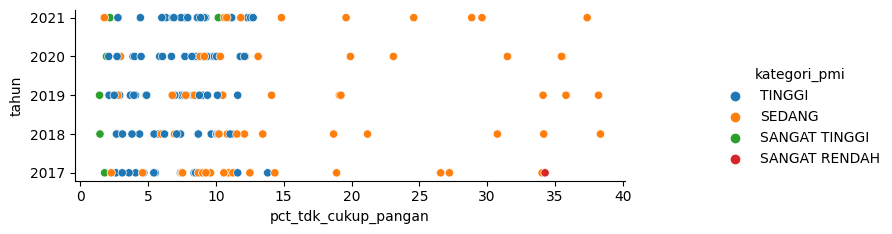

In [239]:
pangan_kate = sns.relplot(x="pct_tdk_cukup_pangan",  y="tahun" , hue="kategori_pmi", data=data_pmi_new)
pangan_kate.fig.set_size_inches(10,2)

Terdapat fenomena unik dimana walaupun kategori PMI meningkat, persenan warga yang menyewa rumah dibanding memiliki rumah sendiri juga meningkat

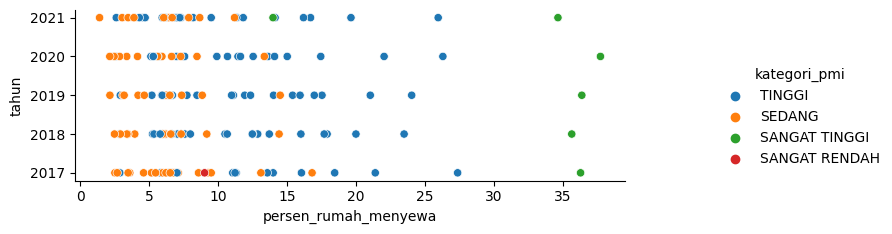

In [240]:
sewa_kate = sns.relplot(x="persen_rumah_menyewa",  y="tahun" , hue="kategori_pmi", data=data_pmi_new)
sewa_kate.fig.set_size_inches(10,2)

Dari perbandingan dibawah, dapat dikatakan bahwa faktor kerja informal pada sektor non pertanian bukanlah faktor yang paling membedakan tiap tingkatan PMI. Tiap tingkatan terlihat tersebar dalam persenan faktor pekerjaan ini, terutama pada tingkatan tinggi dengan sedang.

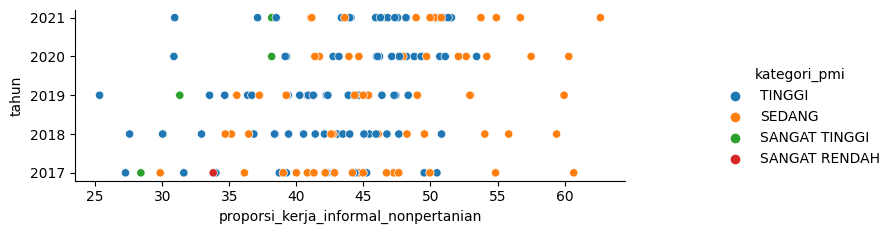

In [241]:
kerja_kate = sns.relplot(x="proporsi_kerja_informal_nonpertanian",  y="tahun" , hue="kategori_pmi", data=data_pmi_new)
kerja_kate.fig.set_size_inches(10,2)

Pada persenan terampil, memiliki pengaruh terbesar. Diaman faktor ini menjadi faktor yang paling membedakan tiap tingkatan pmi

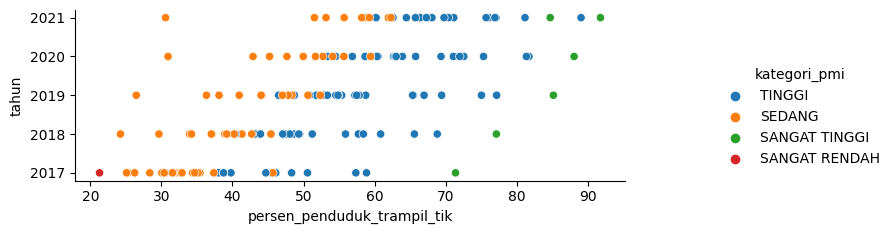

In [242]:
trampil_kate = sns.relplot(x="persen_penduduk_trampil_tik",  y="tahun" , hue="kategori_pmi", data=data_pmi_new)
trampil_kate.fig.set_size_inches(10,2)

### Pembuatan Model

Pembuatan dataset untuk model

In [243]:
model = data_pmi_new.drop(['prov', 'tahun'], axis = 1)
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   kategori_pmi                          170 non-null    object 
 1   pct_tdk_cukup_pangan                  170 non-null    float64
 2   proporsi_kerja_informal_nonpertanian  170 non-null    float64
 3   persen_rumah_menyewa                  170 non-null    float64
 4   persen_penduduk_trampil_tik           170 non-null    float64
dtypes: float64(4), object(1)
memory usage: 12.0+ KB


Klasifikasi terget yang ingin dibuat

In [244]:
le = preprocessing.LabelEncoder()
le.fit(model.kategori_pmi)
Y = le.transform(model.kategori_pmi)
list(le.classes_)

['SANGAT RENDAH', 'SANGAT TINGGI', 'SEDANG', 'TINGGI']

In [245]:
list(le.inverse_transform([1, 3, 2, 0]))

['SANGAT TINGGI', 'TINGGI', 'SEDANG', 'SANGAT RENDAH']

Membuat data tanpa target untuk masukan dalam pembuatan model

In [246]:
X = model.drop("kategori_pmi",axis=1)

Split data training dan data testing

In [252]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5,random_state=123)


Y_test tidak memiliki nilai '0' sehingga akan ada keliruan pada pembuatan model. Dapat dikarenakan jumlah nilai 0 yang tidak terlalu banyak

In [254]:
np.unique(Y_test)

array([1, 2, 3])

Pembuatan model dengan Decision Tree

In [255]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.788235294117647
              precision    recall  f1-score   support

           1       0.50      0.33      0.40         3
           2       0.88      0.65      0.75        34
           3       0.76      0.92      0.83        48

    accuracy                           0.79        85
   macro avg       0.71      0.63      0.66        85
weighted avg       0.80      0.79      0.78        85



Pembuatan model dengan Random Forest

In [256]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=123)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.8941176470588236
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.93      0.82      0.87        34
           3       0.87      0.96      0.91        48

    accuracy                           0.89        85
   macro avg       0.93      0.82      0.86        85
weighted avg       0.90      0.89      0.89        85



Pembuatan model dengan XGBoost

In [257]:
import xgboost as xgb
clf = xgb.XGBClassifier(objective = "multi:softprob", num_class = 4, eval_metric = "mlogloss", max_depth = 24, gamma=0.1, subsample = 0.90,learning_rate=0.01, n_estimators = 10, nthread=-1)
# num_class adalah jumlah kelas
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.9058823529411765
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.97      0.82      0.89        34
           3       0.87      0.98      0.92        48

    accuracy                           0.91        85
   macro avg       0.95      0.82      0.87        85
weighted avg       0.91      0.91      0.90        85



#### Catatan pada model
Model yang dibuat tidak mengenali kelas tingkat PMI "Sangat Rendah" yang diwakilkan dengan nilai '0'. Dapat dimungkinkan bahwa data tingkat PMI "Sangat rendah" terlalu sedikit sehingga model tidak mengenalinya (dapat dilihat pada Y_test dimana tidak memiliki nilai '0' didalamnya). Kemungkinan pemecahan masalah adalah dengan memperbanyak data dari tingkat PMI "Sangat Rendah"